## 자동 미분과 선형 회귀 실습
- 선형 회귀를 텐서플로우와 케라스를 통해 구현
- https://wikidocs.net/111472

### 자동미분

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5 #임의의 식
  return z

In [3]:
# tape_gradient()는 자동 미분 기능을 수행
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 자동 미분을 이용한 선형 회귀 구현
- 가중치 변수 w와 b를 선언
- 학습될 값이므로 임의의 값인 4와 1로 초기화

In [4]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [5]:
# 가설을 함수로서 정의
@tf.function
def hypothesis(x):
  return w*x + b

In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [8]:
# 평균 제곱 오차를 손실 함수로서 정의
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [10]:
# 옵티마이저는 경사 하강법을 사용
# 학습률(learning rate)는 0.01을 사용
optimizer = tf.optimizers.SGD(0.01)

In [11]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

- w와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인 가능

In [12]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


### 케라스로 구현하는 선형 회귀
- 케라스로 모델을 만드는 기본적인 형식
    - Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가

model = Sequential() <br>
model.add(keras.layers.Dense(1, input_dim=1))
- 첫번째 인자인 1은 출력의 차원을 정의, output_dim
- 두번째 인자인 input_dim은 입력의 차원을 정의

- 공부한 시간을 x, 각 공부한 시간에 따른 성적을 y라고 가정
- activation: 어떤 함수를 사용할 것인지를 의미
    - 선형 회귀를 사용할 경우에는 linear라고 기재
- 옵티마이저로 기본 경사 하강법 사용시 SGD 기재
- 학습률 0.01로 정함
- 손실함수로는 평균 제곱 오차 사용
- 훈련 횟수 epochs 은 300으로 설정

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300


C:\Users\JiyoonLee\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 355ms/step - loss: 3770.4861 - mse: 3770.4861
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 465.0029 - mse: 465.0029
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 58.2869 - mse: 58.2869
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 8.2424 - mse: 8.2424
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 2.0836 - mse: 2.0836
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.3247 - mse: 1.3247
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2302 - mse: 1.2302
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2174 - mse: 1.2174
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2147 - mse: 1.2147
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2133 - mse: 1.2133
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 1.212

1/1 [==============================] - 0s 5ms/step - loss: 1.1399 - mse: 1.1399
Epoch 90/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1393 - mse: 1.1393
Epoch 91/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1386 - mse: 1.1386
Epoch 92/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1380 - mse: 1.1380
Epoch 93/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1373 - mse: 1.1373
Epoch 94/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1367 - mse: 1.1367
Epoch 95/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1361 - mse: 1.1361
Epoch 96/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1354 - mse: 1.1354
Epoch 97/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1348 - mse: 1.1348
Epoch 98/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1342 - mse: 1.1342
Epoch 99/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1336 - ms

1/1 [==============================] - 0s 5ms/step - loss: 1.0990 - mse: 1.0990
Epoch 177/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0987 - mse: 1.0987
Epoch 178/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0984 - mse: 1.0984
Epoch 179/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0980 - mse: 1.0980
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0977 - mse: 1.0977
Epoch 181/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0974 - mse: 1.0974
Epoch 182/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0971 - mse: 1.0971
Epoch 183/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0968 - mse: 1.0968
Epoch 184/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0965 - mse: 1.0965
Epoch 185/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0962 - mse: 1.0962
Epoch 186/300
1/1 [==============================] - 0s 6ms/step - loss: 1

1/1 [==============================] - 0s 4ms/step - loss: 1.0790 - mse: 1.0790
Epoch 264/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0788 - mse: 1.0788
Epoch 265/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0787 - mse: 1.0787
Epoch 266/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0785 - mse: 1.0785
Epoch 267/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0784 - mse: 1.0784
Epoch 268/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0782 - mse: 1.0782
Epoch 269/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0781 - mse: 1.0781
Epoch 270/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0779 - mse: 1.0779
Epoch 271/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0778 - mse: 1.0778
Epoch 272/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0776 - mse: 1.0776
Epoch 273/300
1/1 [==============================] - 0s 4ms/step - loss: 1

1/1 [==============================] - 0s 72ms/step


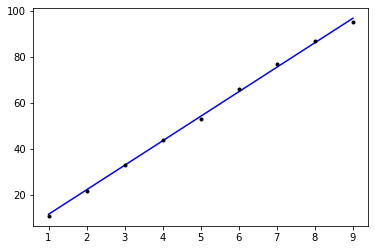

In [14]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [15]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 41ms/step
[[102.16587]]
